## Plotting geomorphemes through novels


# Code and commands

Importing basic functionality

In [2]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
from dhlab.nbtokenizer import tokenize
from collections import Counter
import pandas as pd

import zipfile
from bs4 import BeautifulSoup
import sys
import zipfile
import re
from IPython.display import display, Markdown
import imp
import os
import matplotlib.pyplot as plt # tar med for mer detaljert plotting
## Korpuset kommer som en zip

#import corpus as co

# Creating functions

- Count_text(places, text, group = "gruppe", window = 5000, pr = 100) takes a dataset (places), e.g. a spread sheet, and a text (text) and a column from the dataframe (group). The function counts a given window of words for each pr value. The default is to stop and count a window of 5000 words for every 100 word throughout the text. What is being counted is the frequency of the words in the given column (group). The function returns the novel as a df where columns are "pr", rows are the words in the given column set by group, and values are the count of each word within a window of 5000 words starting from the pr value.

- text_to_df(text) returns a text as a dataframe with frequency count. 

Funksjone tar stedsdataene som input pluss en tekst, pluss hvilken kolonne det skal grupperes på. Viser hvordan det hele går til under. Først med gruppe-kolonnen, som også er default, så med de andre.

In [3]:
def count_text(places, text, group = "gruppe", window = 5000, pr = 100):
    """ w is a word, text an array of words, 
    count w in window, 
    next window is pr characters in
    places is a dataframe of placenames"""
    
        
    # do the counting by looping through the text
    c = {i:Counter(text[i:i + window]) for i in range(0, len(text), pr)}
    
    # while c contains all the counts for all the words in the text
    # only the ones from the groups are relevant
    a = pd.DataFrame.from_dict(c, orient = 'columns')
    df = a.merge(places[[group, 'geomorfemer']], left_index = True, right_on = 'geomorfemer').fillna(0)
    df = df.set_index([group, 'geomorfemer'])
    return df

In [4]:
def text_to_df(text): 
    df=pd.DataFrame.from_dict(Counter(text),orient='index')
    return df

## Creating corpus
Building corpus from lokal zip-file or folder.

In [4]:
kilde = "Tekster"
kildefiler = os.listdir(kilde)

In [5]:
kilder_korpus = co.make_corpus(kilde)
kilder_korpus_string = co.make_corpus(kilde, extraction = co.extract_text_as_string)

Fetching text as string

# Anders

i de to første cellene under har jeg tatt utgangspunkt i den cellen du har brukt her for å lage posisjoner for bøkene i `df`

In [6]:
text1 = [w for p in kilder_korpus['BS_Skram_ConstanceRing_tekst.xml'] for w in p]
text2 = [w for p in kilder_korpus['BS_Skram_SjurGabriel_tekst.xml'] for w in p]
text3 = [w for p in kilder_korpus['BS_Skram_ToVenner_tekst.xml'] for w in p]
text4 = [w for p in kilder_korpus['BS_Skram_Lucie_tekst.xml'] for w in p]
text5 = [w for p in kilder_korpus['BS_Skram_SGMyre_tekst.xml'] for w in p]
text6 = [w for p in kilder_korpus['BS_Skram_FruInes_tekst.xml'] for w in p]
text7 = [w for p in kilder_korpus['BS_Skram_Forraadt_tekst.xml'] for w in p]
text8 = [w for p in kilder_korpus['BS_Skram_ProfessorHieronimus_tekst.xml'] for w in p]
text9 = [w for p in kilder_korpus['BS_Skram_SctJorgen_tekst.xml'] for w in p]
text10 = [w for p in kilder_korpus['BS_Skram_Afkom_tekst.xml'] for w in p]

En array av tekst

In [7]:
text_elements = [text1,
text2,
text3,
text4,
text5,
text6,
text7,
text8,
text9,
text10]


Kopierer over uttrykket for å hente ut titler

In [8]:
t = """text1 = [w for p in kilder_korpus['BS_Skram_ConstanceRing_tekst.xml'] for w in p]
text2 = [w for p in kilder_korpus['BS_Skram_SjurGabriel_tekst.xml'] for w in p]
text3 = [w for p in kilder_korpus['BS_Skram_ToVenner_tekst.xml'] for w in p]
text4 = [w for p in kilder_korpus['BS_Skram_Lucie_tekst.xml'] for w in p]
text5 = [w for p in kilder_korpus['BS_Skram_SGMyre_tekst.xml'] for w in p]
text6 = [w for p in kilder_korpus['BS_Skram_FruInes_tekst.xml'] for w in p]
text7 = [w for p in kilder_korpus['BS_Skram_Forraadt_tekst.xml'] for w in p]
text8 = [w for p in kilder_korpus['BS_Skram_ProfessorHieronimus_tekst.xml'] for w in p]
text9 = [w for p in kilder_korpus['BS_Skram_SctJorgen_tekst.xml'] for w in p]
text10 = [w for p in kilder_korpus['BS_Skram_Afkom_tekst.xml'] for w in p]aqa"""

In [9]:
import re

In [10]:
names = re.findall(".*BS_Skram_([^_]+).*", t)
names

['ConstanceRing',
 'SjurGabriel',
 'ToVenner',
 'Lucie',
 'SGMyre',
 'FruInes',
 'Forraadt',
 'ProfessorHieronimus',
 'SctJorgen',
 'Afkom']

In [11]:
lengths = [len(x) for x in text_elements]

In [12]:
lengths

[120989, 31599, 57216, 57308, 114587, 40548, 47111, 68700, 53698, 130700]

Lager til en kumulativ liste med posisjoner der hvert nytt verk kommer inn

In [13]:
break_points = [lengths[0]]
for i, e in enumerate(lengths[1:]):
    break_points.append(break_points[i] + e)
break_points

[120989,
 152588,
 209804,
 267112,
 381699,
 422247,
 469358,
 538058,
 591756,
 722456]

Så nå er alt klart til å plotte bøker med titler inn i diagrammene. 

In [14]:
# sveiser sammen alle romanene etter hverandre kronologisk
text = text1+text2+text3+text4+text5+text6+text7+text8+text9+text10

In [15]:
len(text)

722456

Reading the dataset (in this case a spreadsheet containing all geomorphemes in Skram)

In [16]:
geomorph = pd.read_excel("Geomorfemer_Skram.xlsx", sheet_name='Sheet1')

Removes empty or unspecified rows

In [17]:
geomorph = geomorph.dropna(subset = ['geomorfemer'])

Remove duplicates from geomorph and put the result in geomorph_unique

In [18]:
geomorph_unique = geomorph.drop_duplicates()

In [19]:
#inspecting data
geomorph_unique[geomorph_unique.Geo == 1].head(50)

,geomorfemer,gruppe,Geo,type,Funksjon,region,by,land
0,Aker,Aker,1.0,toponym,NaN,byen,Oslo,Norge
1,Akersgaden,Akersgaden,1.0,toponym,infrastruktur,byen,Oslo,Norge
2,Alexandrien,Alexandrien,1.0,toponym,NaN,verden,Aleksandria,Egypt
3,Alhambra,Alhambra,1.0,toponym,NaN,verden,London,England
6,Altona,Altona,1.0,toponym,NaN,verden,Hamburg,Tyskland
8,Amerika,Amerika,1.0,toponym,NaN,verden,NaN,Amerika
20,Antigoni,Antigoni,1.0,toponym,NaN,verden,Burgazada,Tyrkia
24,Arendal,Arendal,1.0,toponym,NaN,byen,Arendal,Norge
31,Askelandet,Askeland,1.0,toponym,NaN,NaN,NaN,Norge
32,Askøya,Askøy,1.0,toponym,NaN,NaN,NaN,Norge


Telling blir implementert som en telling fra gruppene, sånn at alle steder som faller inn under gruppen bidrar.

## Counting

Counting data. Ther result is a multiindex, grouped by `group` here set to `gruppe`.


The columns mark the positions in the text from which the counting of each window starts. 


In [20]:
df = count_text(geomorph_unique, text, group = 'gruppe', window= 3000,  pr=500)
df.head(10)

,,0,500,1000,1500,2000,2500,3000,3500,4000,4500,...,717500,718000,718500,719000,719500,720000,720500,721000,721500,722000
gruppe,geomorfemer,,,,,,,,,,,,,,,,,,,,,
værelse,Værelser,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
Homansby,Homansby,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hjem,Hjem,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gulv,Gulvene,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gartneri,Gartneriet,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oscarsgate,Oscarsgade,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hus,Hus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hjem,hjem,9.0,8.0,8.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Kristiania,Kristiania,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


## Plotting the distribution of geomorphemes throughout the novel
We now have the novel as a df in the variable df. We can now visualize the distribution of the geomorphemes.

Visualizing the distribution of the collected geomorphemes throughout the novel. the .sum() function summarizes all the values in the df. 

In [21]:
df.sum()

0         72.0
500       59.0
1000      51.0
1500      49.0
2000      43.0
          ... 
720000    31.0
720500    29.0
721000    21.0
721500    12.0
722000     6.0
Length: 1445, dtype: float64

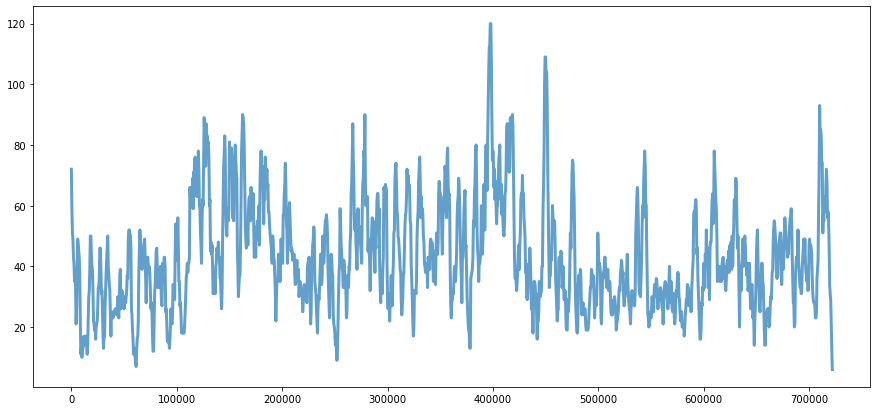

In [22]:
df.sum().plot(figsize = (15,7), lw = 3, alpha = 0.7)

# Spørsmål til Lars:
Hvordan lage en loop som går gjennom hele 'tekster'-mappen og returnerer et geomorf-plot for hver enkelt roman. Plottene kan feks ligge to og to i bredden.

# creating the wrapper book_trend for the above commands

Makes it easier to do other plotting operations from the same material

In [23]:
book_trend = lambda df, group: df.loc[group].groupby(level = 0).sum().transpose().plot(figsize = (17,5), lw = 2, alpha = 0.7);

# Group by other columns. 
By giving the count_text function other columns to count, we can plot this information in the same way. It smart to use the naming convention df_columnname
Here are some examples:

### Counting and plotting the 'type' column

In [24]:
#creating a df counting the type column
df_type = count_text(geomorph_unique, text, group = 'type')

In [25]:
#making a list of every unique value in the 'type' column. placing the list in the variable 'types'
types = list(set(geomorph_unique['type'].dropna().values))
types

['uterom',
 'sosialt',
 'møtested',
 'geoord',
 'byggverk',
 'industri',
 'retning',
 'bygning',
 'Institusjon',
 'romindikator',
 'byrom',
 'eksteriør',
 'fartøy',
 'fiktivt',
 'bibelsk',
 'interiør',
 'toponym',
 'natur',
 'tilstand']

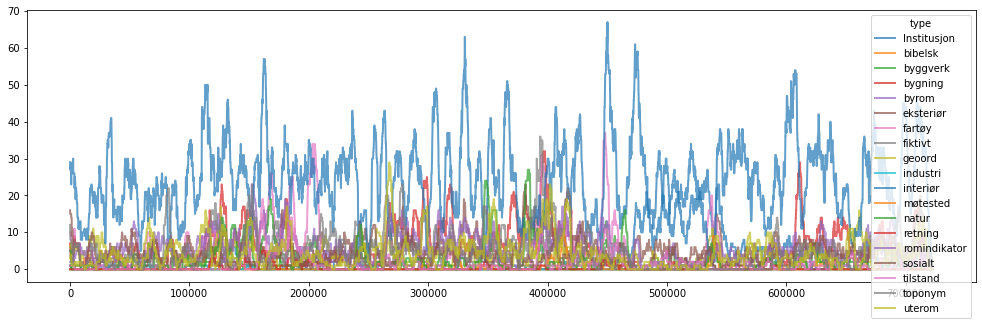

In [26]:
book_trend(df_type, types)

In [27]:
book_trend_agg_type = lambda df, group: df_type.loc[group].groupby(level = 0).sum().sum().transpose().plot(figsize = (15,5), lw = 3, alpha = 0.7);

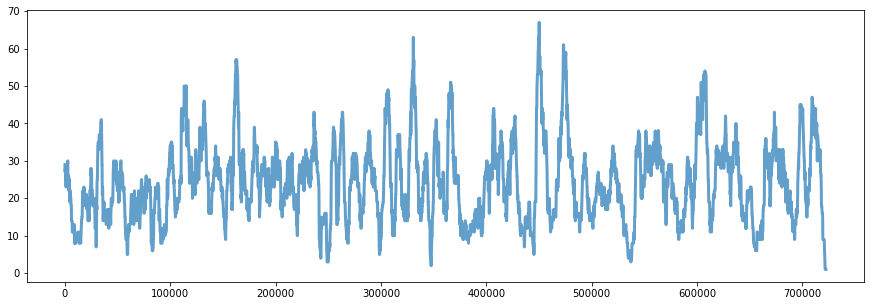

In [28]:
book_trend_agg_type(df_type, "interiør")

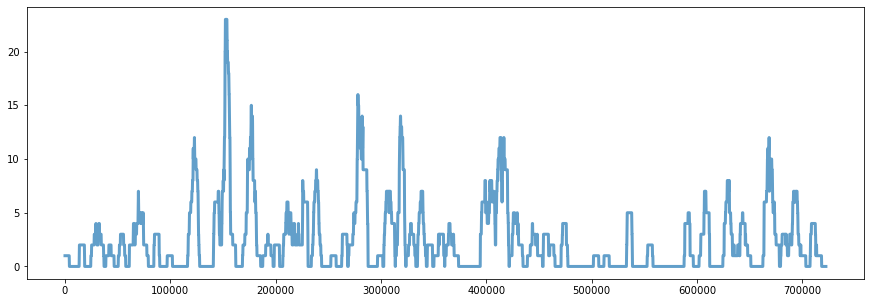

In [29]:
book_trend_agg_type(df_type, "byrom")

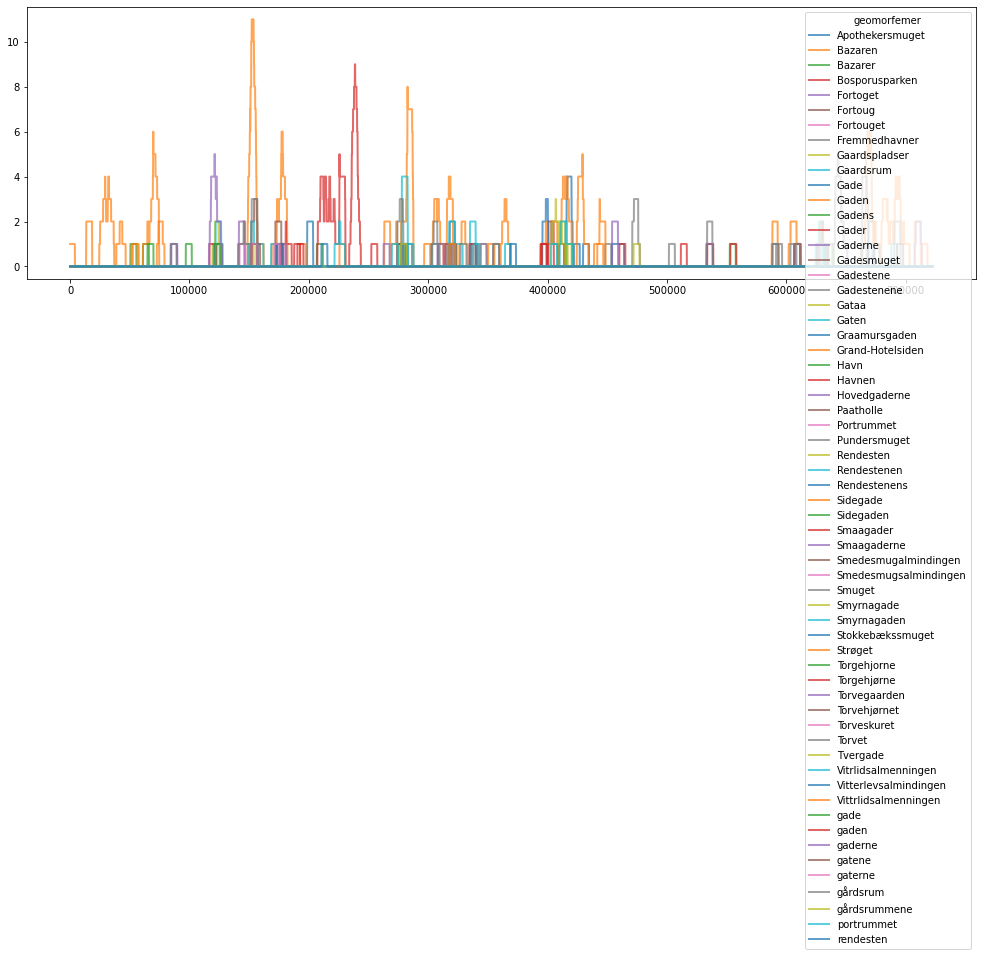

In [30]:
# Counting and plotting the 'byrom' value from the 'type' column
book_trend(df_type,'byrom')

# Spørsmål til Lars:
hvordan får jeg book_trend() til å summere og plotte spesifikke verdier? i plotet ovenfor vil jeg feks egentlig ha én graf som summerer alle byrom, ikke en gra for hvert byrom. Jeg får det til ved å gå utenom wrapperen og lage en egen df gruppert på den verdien jeg er ute etter å telle (se dør-grafen min nedenfor). Men metoden virker litt omstendelig og jeg mistenker at det finnes bedre måter..

### Counting and plotting the 'region' column

In [31]:
df_region = count_text(geomorph_unique, text, group = 'region')

In [32]:
types_r = list(set(geomorph_unique['region'].dropna().values))
types_r

['staten', 'byen', 'hjemmet', 'verden']

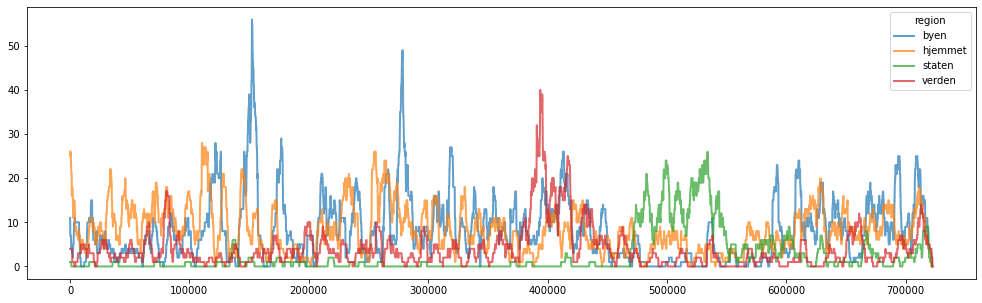

In [33]:
book_trend(df_region, types_r )

## summarizing, counting and plotting a specific value from one of the columns in a df

In [34]:
# first I use count_text() to create a df grouped by the column 'gruppe'
df_gruppe = count_text(geomorph_unique, text, group = 'gruppe')
# next, I use the .loc to create another df grouped by the value 'dør' in the column 'gruppe'
df_gruppe_dør = df_gruppe.loc['dør']
df_gruppe_dør

,0,100,200,300,400,500,600,700,800,900,...,721500,721600,721700,721800,721900,722000,722100,722200,722300,722400
geomorfemer,,,,,,,,,,,,,,,,,,,,,
Glasdøre,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Døren,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dør,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dørene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gadedøren,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Entrédøren,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spiskammerdøren,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kjøkkendøren,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Døraabningen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


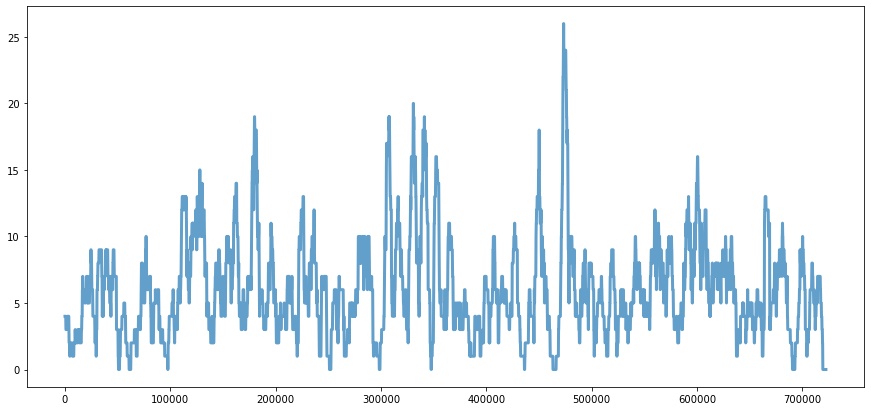

In [35]:
# summarize and plot all values from the df_gruppe_dør dataframe
df_gruppe_dør.sum().plot(figsize = (15,7), lw = 3, alpha = 0.7)

## counting and plotting percentage values of geomorphemes

First, we use the text_to_df() function defined above and render the novel (text) into a df that counts every unique word in the text:

In [36]:
df_text = text_to_df(text)

We now have a the novel as a df counting every unique word: 

In [37]:
df_text

,0
Rings,23
havde,4833
været,289
gift,98
i,10576
...,...
afstedkommer,1
Angaaende,1
Ideal,1
Maanedspenge,1


Now, from this df we want to extract and count every geomorpheme. We extract the geomorphemes by identifying the locations in df_text that matches the values in the df['geomorfemer'] column:

In [38]:
df_text.loc[df.reset_index()['geomorfemer'].values]

,0
Værelser,20
Homansby,2
Hjem,35
Gulvene,3
Gartneriet,1
...,...
Sygeafdelingen,1
Celle,1
Cellen,1
Sykeafdelingen,1


Next, we summarize all geomorphemes with the .sum() function and put them in the variable geo_tot

In [39]:
geo_tot = df_text.loc[df.reset_index()['geomorfemer'].values].sum()

In [40]:
# now geo_tot contains the total number of geomorphemes in wichever novel we have defined as text
geo_tot

0    10396
dtype: int64

Now we can find out how many percent of the novel's words are geomorphemes:

In [41]:
geo_tot*100/df_text.sum()

0    1.43898
dtype: float64

In [42]:
text_tot = df_text.sum()

In [43]:
text_tot

0    722456
dtype: int64

Finally, we want to make bookplots based on relative values. Within each novel, these plots will not differ from those based on absolute values. But in order to compare the novels, relative values are better. 

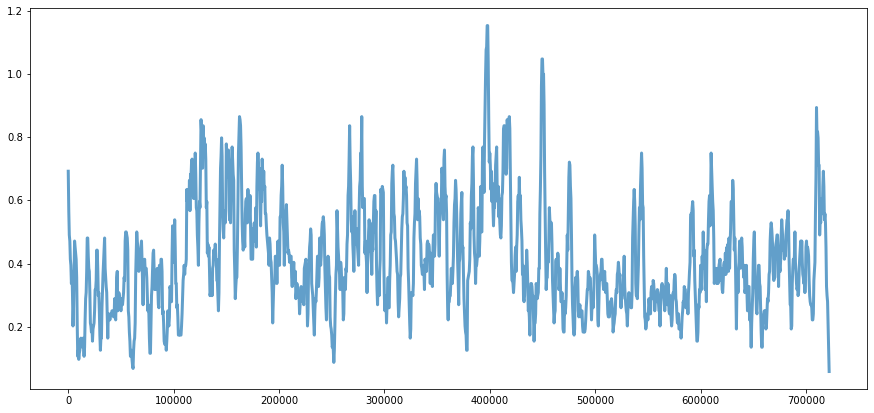

In [44]:
#Plotting script for % of geomorphemes in novel:
(df.sum()*100/int(geo_tot)).plot(figsize = (15,7), lw = 3, alpha = 0.7)

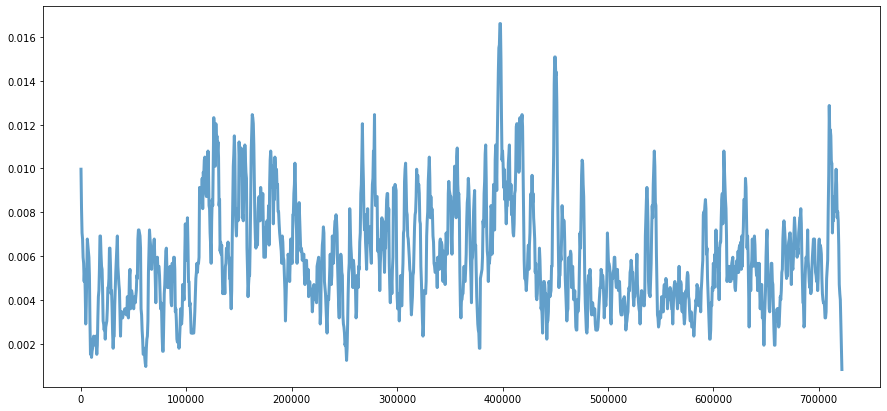

In [45]:
#Plotting script for % of geomorphemes in novel:
(df.sum()*100/int(text_tot)).plot(figsize = (15,7), lw = 3, alpha = 0.7)

# Plotte bøker og linjer
Her er en måte å legge inn markører for bøkene. Farger kan du fylle inn. Koden forutsetter at variablene `break_points` og `names` er satt, som tidlig i notebooken.

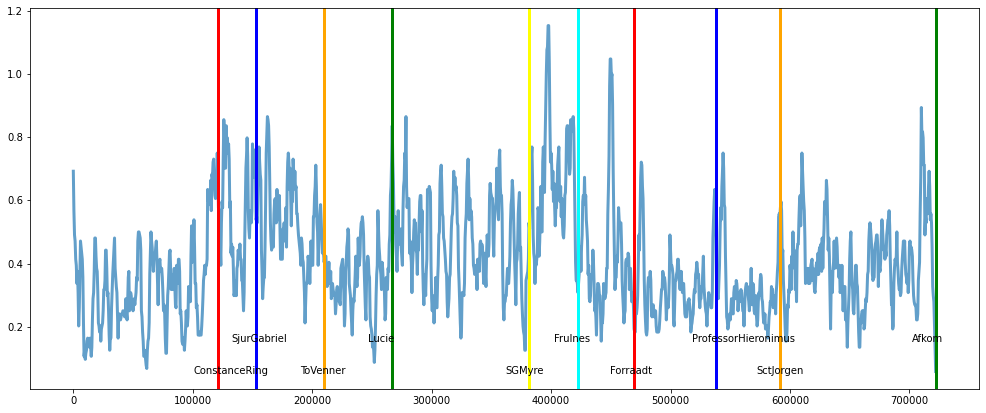

In [46]:
#Plotting script for % of geomorphemes in novel:
ax = (df.sum()*100/int(geo_tot)).plot(figsize = (17,7), lw = 3, alpha = 0.7)
for i, book_position in enumerate(break_points):
    colors = ["red",'blue', 'orange','green', 'yellow', 'cyan']
    plt.axvline(x = book_position,lw=3, label = "bok", color=colors[i%len(colors)])
    #formelen 0.1*(i%2) sørger for at y-posisjonen veksler mellom 0.05 og 0.15 (i%2 vil veksle mellom 0 og 1)
    plt.text(x=book_position - 20000, y = 0.05 + 0.1*(i%2),  s = names[i])

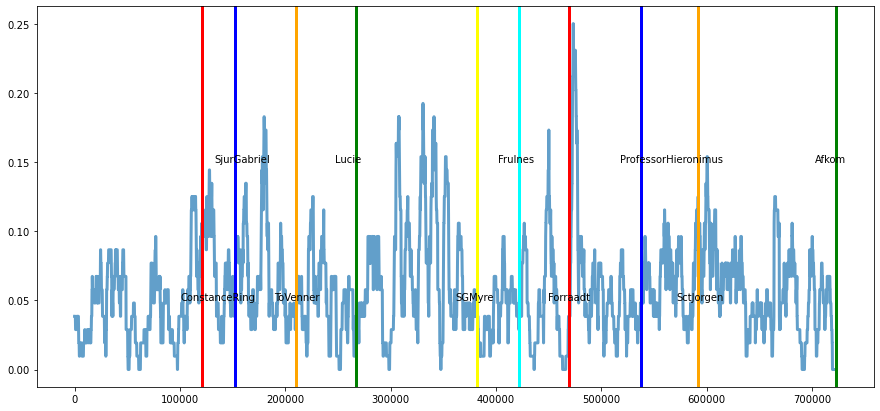

In [47]:
#Plotting script for % of 'dør' in novel:
ax1 = (df_gruppe_dør.sum()*100/int(geo_tot)).plot(figsize = (15,7), lw = 3, alpha = 0.7)
for i, book_position in enumerate(break_points):
    colors = ["red",'blue', 'orange','green', 'yellow', 'cyan']
    plt.axvline(x = book_position,lw=3, label = "bok", color=colors[i%len(colors)])
    #formelen 0.1*(i%2) sørger for at y-posisjonen veksler mellom 0.05 og 0.15 (i%2 vil veksle mellom 0 og 1)
    plt.text(x=book_position - 20000, y = 0.05 + 0.1*(i%2),  s = names[i])

## Lager bokplot på kolonne og celleverdi. Legger interiør og toponymer i samme plot:

In [48]:
df_type_interiør = df_type.loc['interiør']
df_type_toponym = df_type.loc['toponym']

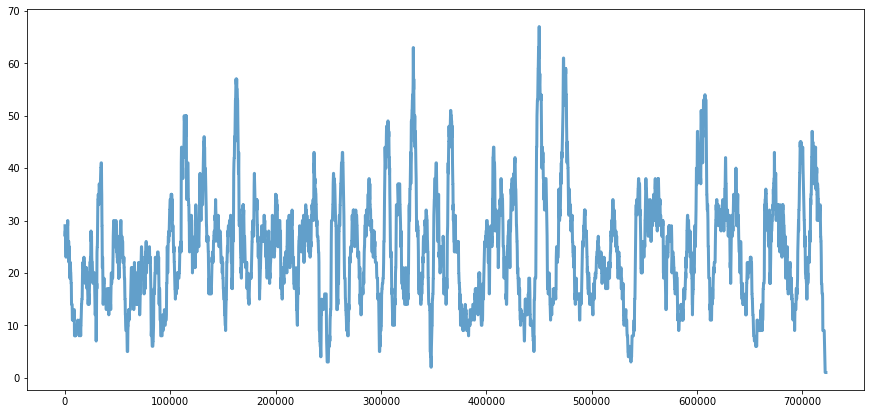

In [49]:
## har sjekket at begge de nye variablene funker. vi kan nå plotte:

df_type_interiør.sum().plot(figsize = (15,7), lw = 3, alpha = 0.7)


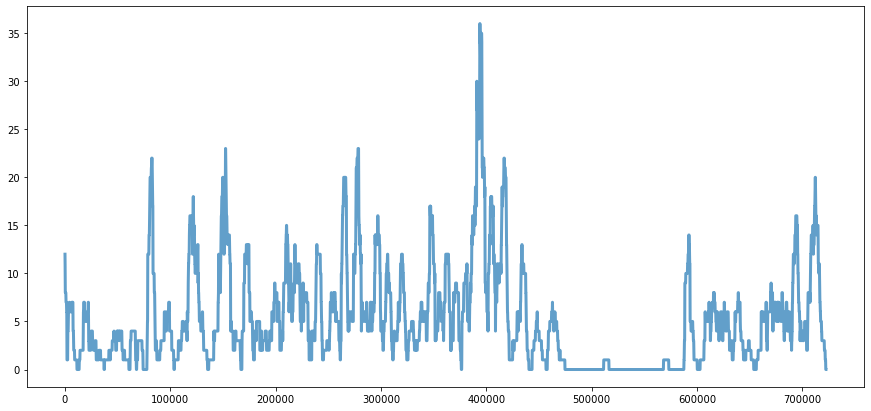

In [50]:
df_type_toponym.sum().plot(figsize = (15,7), lw = 3, alpha = 0.7)

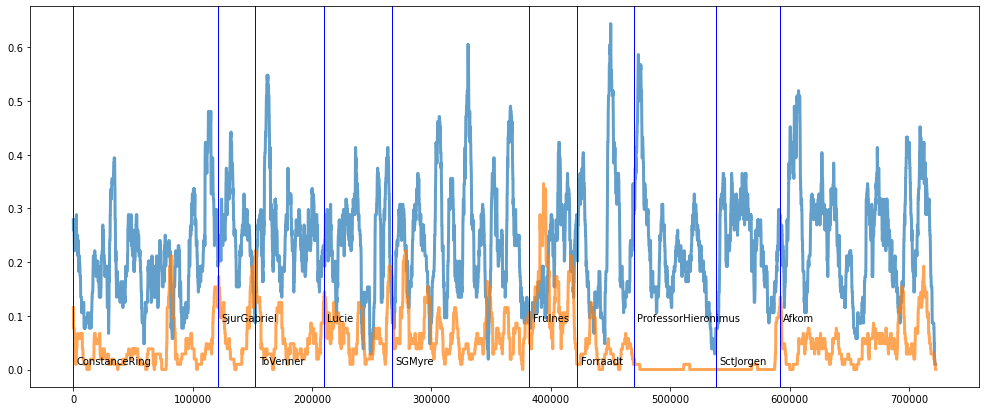

In [51]:
#Om du heller vil ha markert bøkene i starten på perioden bytt ut loop-kontrollen med det her:
 #   for i, book_position in enumerate([0] + break_points[:-1]):
#(altså at du starter på punkt 0, og tar bort siste)
#da kan boknavnet lettere plottes inne i boka (legg til 3000 i stedet for å trekke fra):
  #   plt.text(x=book_position + 3000, y = 0.01 + 0.08*(i%2),  s = names[i])
#Som kanskje kan gjøre det litt enklere å lese.


#Sammenligning av toponym og interiør med relfreq
ax = (df_type_interiør.sum()*100/int(geo_tot)).plot(figsize = (17,7), lw = 3, alpha = 0.7)
(df_type_toponym.sum()*100/int(geo_tot)).plot(ax=ax,figsize = (17,7), lw = 3, alpha = 0.7)
for i, book_position in enumerate([0] + break_points[:-1]):
    colors = ["blue"]
    plt.axvline(x = book_position,lw=1, label = "bok", color=colors[i%len(colors)])
    #formelen 0.1*(i%2) sørger for at y-posisjonen veksler mellom 0.05 og 0.15 (i%2 vil veksle mellom 0 og 1)
    plt.text(x=book_position + 3000, y = 0.01 + 0.08*(i%2),  s = names[i])

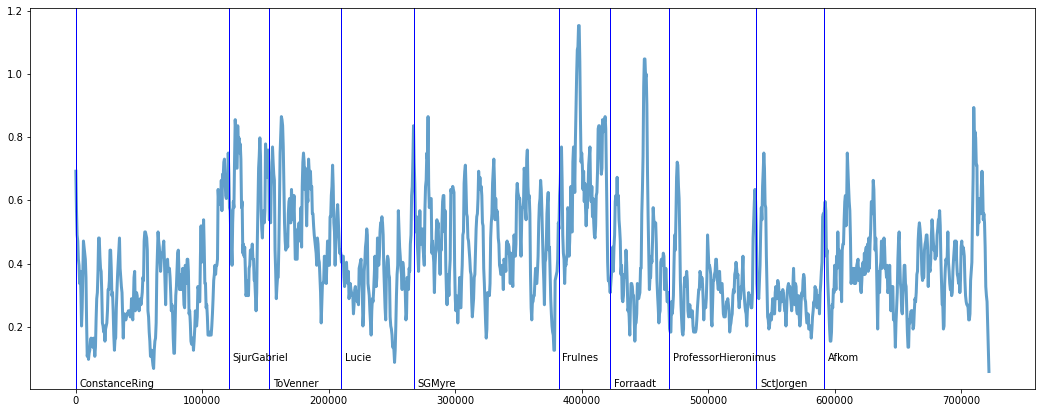

In [52]:
#Plotting script for % of geomorphemes in novel:
(df.sum()*100/int(geo_tot)).plot(figsize = (18,7), lw = 3, alpha = 0.7)
for i, book_position in enumerate([0] + break_points[:-1]):
    colors = ["blue"]
    plt.axvline(x = book_position,lw=1, label = "bok", color=colors[i%len(colors)])
    #formelen 0.1*(i%2) sørger for at y-posisjonen veksler mellom 0.05 og 0.15 (i%2 vil veksle mellom 0 og 1)
    plt.text(x=book_position + 3000, y = 0.01 + 0.08*(i%2),  s = names[i])

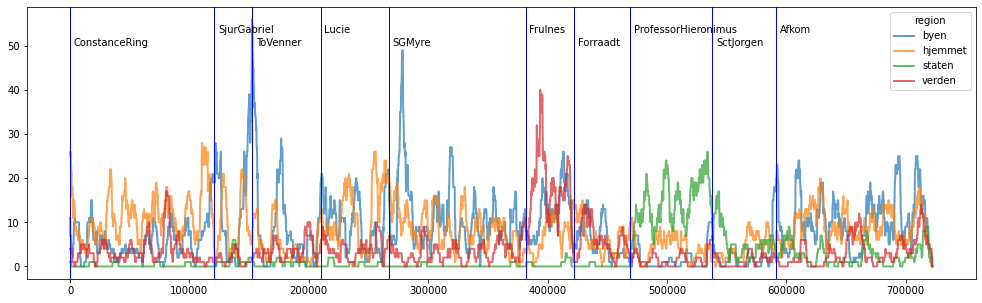

In [53]:
#plotte regionene
book_trend(df_region, types_r )
for i, book_position in enumerate([0] + break_points[:-1]):
    colors = ["blue"]
    plt.axvline(x = book_position,lw=1, label = "bok", color=colors[i%len(colors)])
    #formelen 0.1*(i%2) sørger for at y-posisjonen veksler mellom 0.05 og 0.15 (i%2 vil veksle mellom 0 og 1)
    plt.text(x=book_position + 3000, y = 50 + 3*(i%2),  s = names[i])

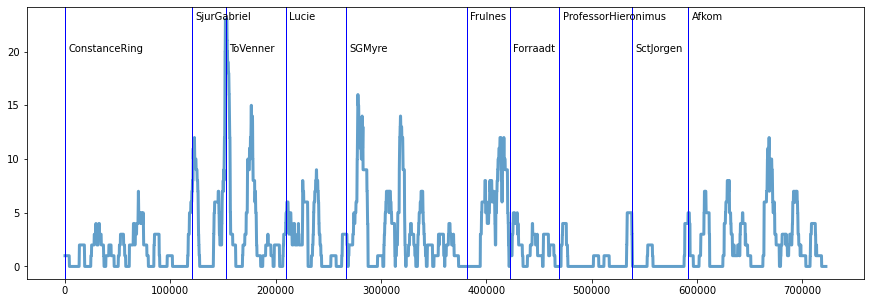

In [54]:
book_trend_agg_type(df_type, "byrom")
for i, book_position in enumerate([0] + break_points[:-1]):
    colors = ["blue"]
    plt.axvline(x = book_position,lw=1, label = "bok", color=colors[i%len(colors)])
    #formelen 0.1*(i%2) sørger for at y-posisjonen veksler mellom 0.05 og 0.15 (i%2 vil veksle mellom 0 og 1)
    plt.text(x=book_position + 3000, y = 20 + 3*(i%2),  s = names[i])

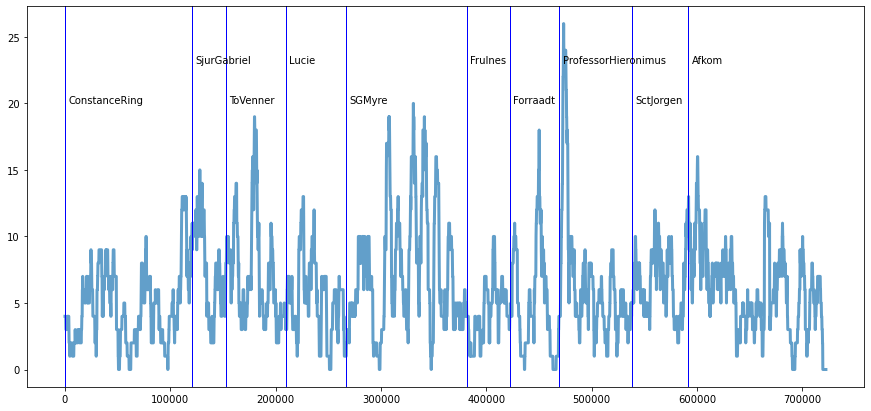

In [55]:
# summarize and plot all values from the df_gruppe_dør dataframe
df_gruppe_dør.sum().plot(figsize = (15,7), lw = 3, alpha = 0.7)
for i, book_position in enumerate([0] + break_points[:-1]):
    colors = ["blue"]
    plt.axvline(x = book_position,lw=1, label = "bok", color=colors[i%len(colors)])
    #formelen 0.1*(i%2) sørger for at y-posisjonen veksler mellom 0.05 og 0.15 (i%2 vil veksle mellom 0 og 1)
    plt.text(x=book_position + 3000, y = 20 + 3*(i%2),  s = names[i])

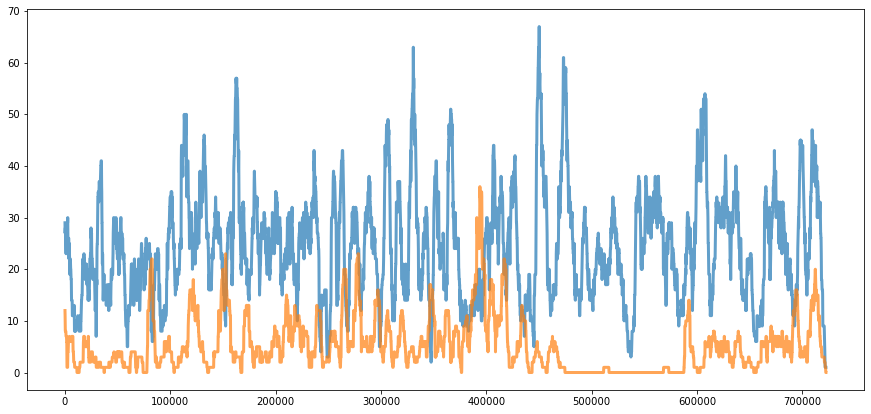

In [56]:
#Sammenligning av toponym og interiør med totfreq
ax1 = df_type_interiør.sum().plot(figsize = (15,7), lw = 3, alpha = 0.7)
df_type_toponym.sum().plot(ax=ax1, figsize = (15,7), lw = 3, alpha = 0.7)

In [57]:
df_type_interiør = df_type.loc['interiør']
df_type_toponym = df_type.loc['toponym']

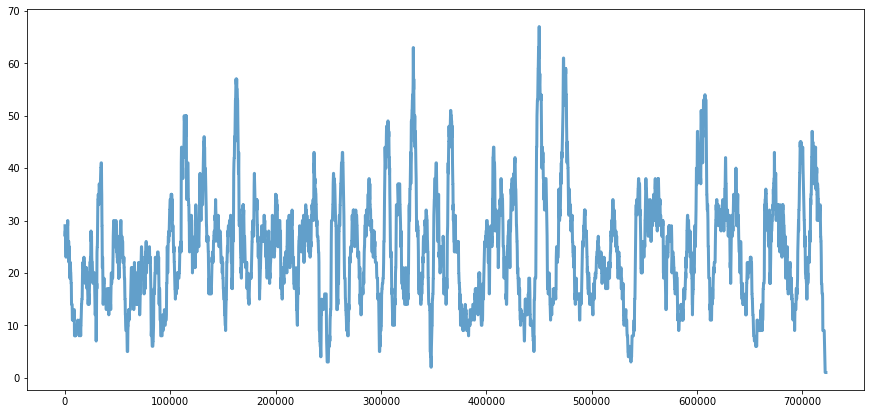

In [58]:
## har sjekket at begge de nye variablene funker. vi kan nå plotte:

df_type_interiør.sum().plot(figsize = (15,7), lw = 3, alpha = 0.7)

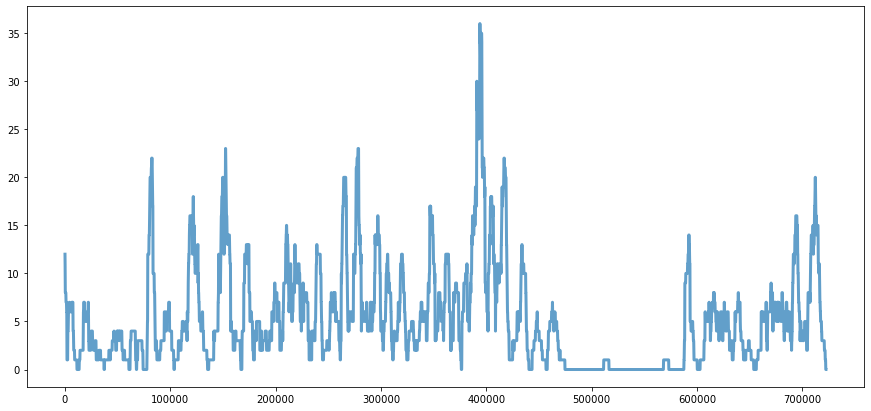

In [59]:
df_type_toponym.sum().plot(figsize = (15,7), lw = 3, alpha = 0.7)

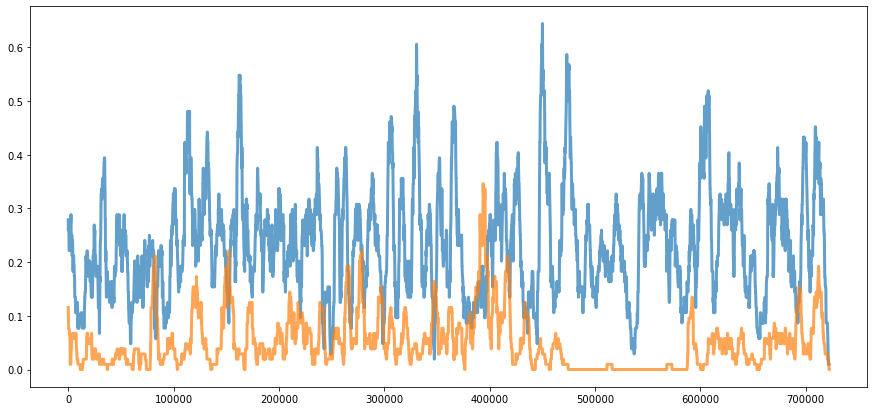

In [60]:
#Sammenligning av toponym og interiør med relfreq
ax = (df_type_interiør.sum()*100/int(geo_tot)).plot(figsize = (15,7), lw = 3, alpha = 0.7)
(df_type_toponym.sum()*100/int(geo_tot)).plot(ax=ax,figsize = (15,7), lw = 3, alpha = 0.7)

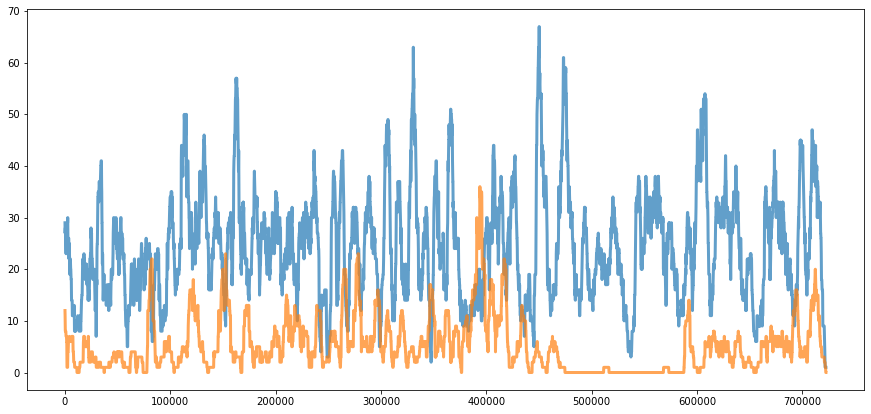

In [61]:
#Sammenligning av toponym og interiør med totfreq
ax1 = df_type_interiør.sum().plot(figsize = (15,7), lw = 3, alpha = 0.7)
df_type_toponym.sum().plot(ax=ax1, figsize = (15,7), lw = 3, alpha = 0.7)

In [62]:
##skjønner ikke hvorfor jeg plutselig har mistet 400 geomorfemer..

In [63]:
current = pd.read_excel("Geomorfemer_Skram.xlsx", sheet_name='Sheet1')

In [64]:
old = pd.read_excel("Copy_of_Geomorfemer_Skram_04.19.22.xlsx", sheet_name='Sheet1')

In [65]:
current = current.dropna(subset = ['geomorfemer'])

In [66]:
old = old.dropna(subset = ['geomorfemer'])

In [67]:
old['geomorfemer']

0            Akersgaden
1           Alexandrien
2              Alhambra
3              Alhambra
4              Alhambra
             ...       
9955         Paradisets
9956     Havsens Botten
9957        Bodsfængsel
9958           Afgrunde
9959    Smaastrandgaden
Name: geomorfemer, Length: 9960, dtype: object

In [68]:
current_lst = list(current['geomorfemer'])

In [69]:
old_lst = list(old['geomorfemer'])

In [70]:
diff = []
for x in old_lst:
    if not x in current_lst:
        diff.append(x)
diff

['Thibets',
 'Thibets',
 'Thibets',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'hagen',
 'hagen',
 'hagen',
 'Hagen',
 'hagen',
 'hagen',
 'hagen',
 'hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Hagen',
 'Nor',
 'Nor',
 'Nor',
 'Nord',
 'Nord',
 'Nord',
 'Nord',
 'Nordost',
 'Nordost',
 'Rælingen',
 'Rælingen',
 'Rælingen',
 'Rælingen',
 'Rælingen',
 'Rælingen',
 'Rælingen',
 'Rælingen',
 'Rælingen',
 'Rælingen',
 'Rælingen',
 'Styrbord',
 'Styrbord',
 'Styrbord',
 'Styrbord',
 'Toppen',
 'Toppen',
 'Toppen',
 'Toppen',
 'Toppen',
 'Toppen',
 'Toppen',
 'Toppen',
 'Toppen',
 'Toppen',
 'Toppen',
 'Toppen',
 'Hvælvet',
 'Hvælvet',
 'Hvælvet',
 'Vest',
 'Vest',
 'Vest',
 'Vest',
 'Vest',
 '

# 